# SYDE 556/750 --- Assignment 4
**Student ID: 20883350**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_04/syde556_assignment_04.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import nengo and some helper functions for Q1
import nengo
from nengo.utils.ensemble import tuning_curves
from nengo.utils.connection import eval_point_decoding

import seaborn as sns

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Building an ensemble of neurons

**a) Tuning curves.** Plot the population tuning curves. Plot the representation accuracy plot ($x - \hat{x}$). Compute and report the RMSE.

In [2]:
model = nengo.Network(seed=8)

with model:
    ens_1d = nengo.Ensemble(
        n_neurons = 100,
        dimensions = 1,
        intercepts = nengo.dists.Uniform(-1, 1),
        max_rates = nengo.dists.Uniform(100, 200),
        neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.002)
    )

    self_identity_conn = nengo.Connection(ens_1d, ens_1d, function=lambda x: x)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Tuning Curves for 100 Neurons')

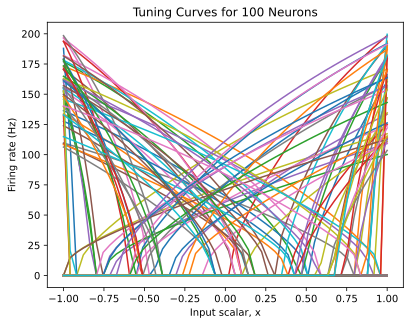

In [3]:
with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(ens_1d, sim)

    _, targets, decoded = eval_point_decoding(
        self_identity_conn, sim, eval_points=eval_points
    )

plt.figure()
plt.plot(eval_points, activities)
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")
plt.title("Tuning Curves for 100 Neurons")

In [4]:
def plot_decoded_error(x, x_hat, title):
    rmse = np.sqrt(np.mean((x - x_hat) ** 2))
    ax = sns.lineplot(x = x, y = x - x_hat)
    ax.set_title(f"{title} (RMSE = {round(rmse, 4)})")
    ax.set_xlabel("Represented value x")
    ax.set_ylabel("Representation Error")
    return rmse

In [5]:
eval_points.shape, targets.shape, decoded.shape

((50, 1), (50, 1), (50, 1))

In [6]:
targets[:, 0].shape

(50,)

0.0064411057741742385

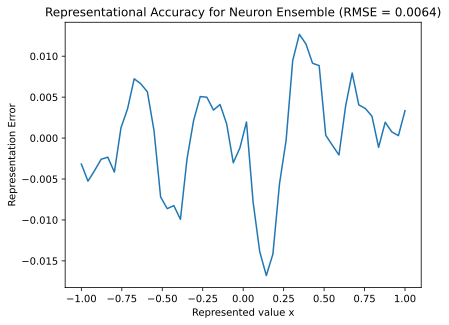

In [7]:
plot_decoded_error(targets[:, 0], decoded[:, 0], "Representational Accuracy for Neuron Ensemble")

**b) RMSE and radius.** Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Compute the RMSE for (at least) the four different radii $0.5$, $1$, $2$, and $4$. Plot your results. Make sure your neurons have the same (relative, i.e., scaled by the radius) $x$-intercepts and maximum rates across all experiments.

In [8]:
radii = [0.5, 1, 2, 4, 8, 16]
radii

[0.5, 1, 2, 4, 8, 16]

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

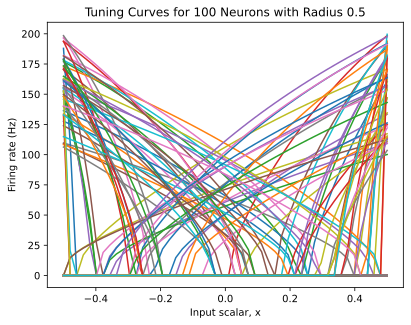

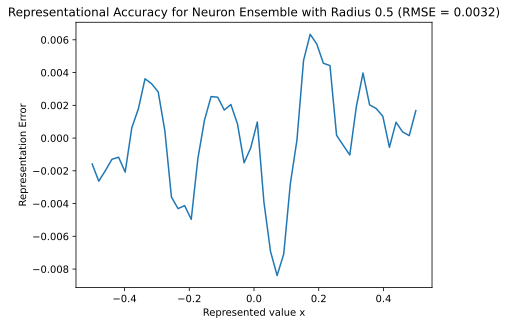

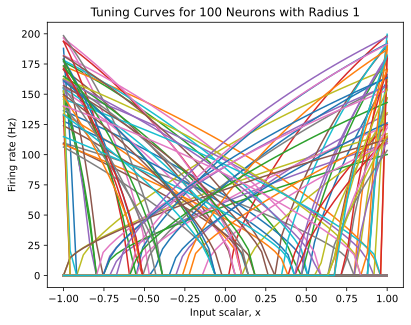

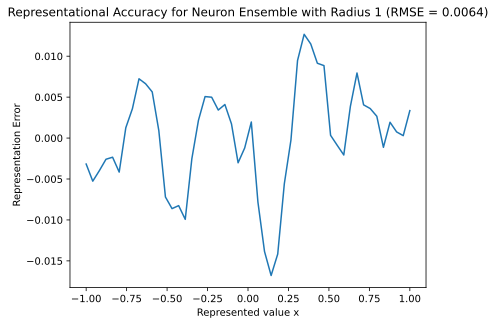

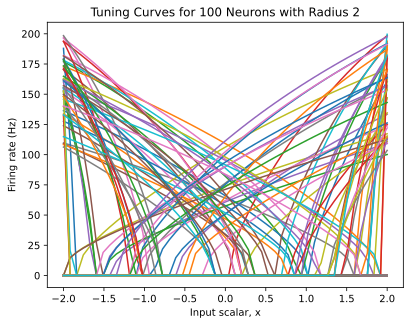

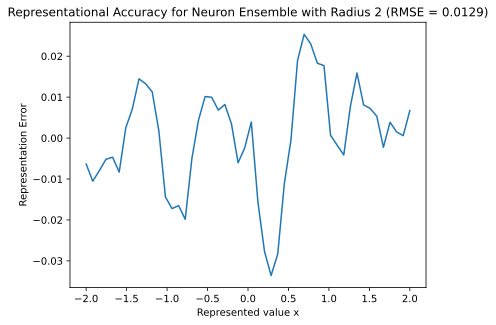

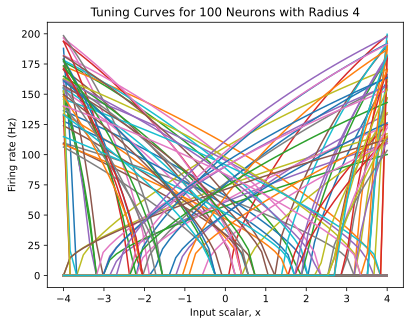

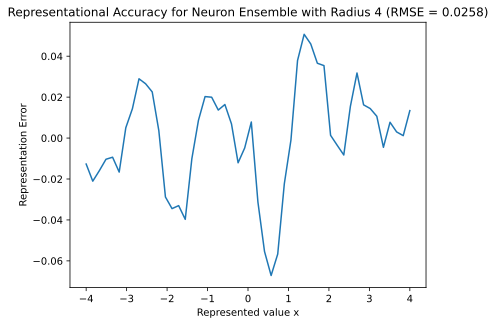

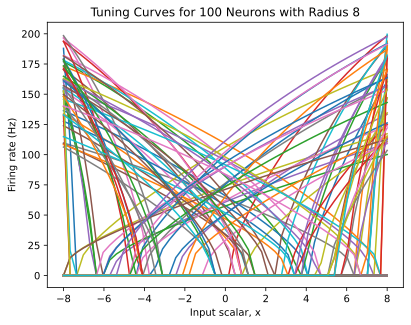

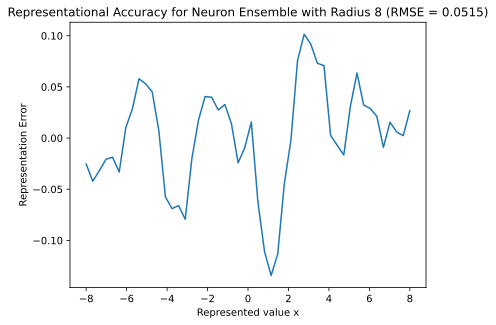

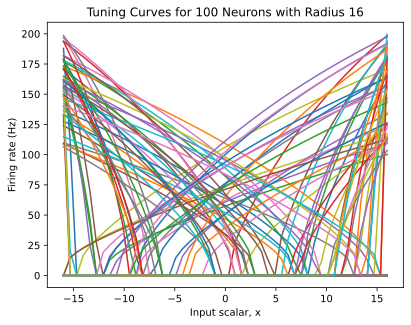

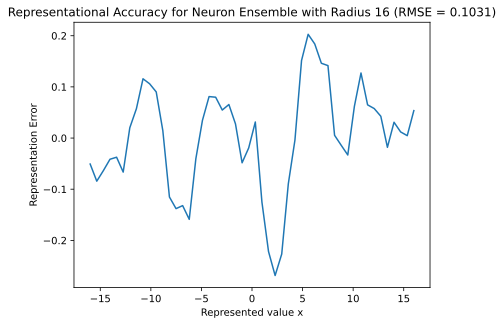

In [9]:
rmse_by_radius = []
for radius in radii:
    with model:
        ens_1d.radius = radius

    with nengo.Simulator(model) as sim:
        eval_points, activities = tuning_curves(ens_1d, sim)

        _, targets, decoded = eval_point_decoding(
            self_identity_conn, sim, eval_points=eval_points
        )

    plt.figure()
    plt.plot(eval_points, activities)
    plt.ylabel("Firing rate (Hz)")
    plt.xlabel("Input scalar, x")
    plt.title(f"Tuning Curves for 100 Neurons with Radius {radius}")

    plt.figure()
    rmse = plot_decoded_error(targets[:, 0], decoded[:, 0], f"Representational Accuracy for Neuron Ensemble with Radius {radius}")
    rmse_by_radius.append(rmse)

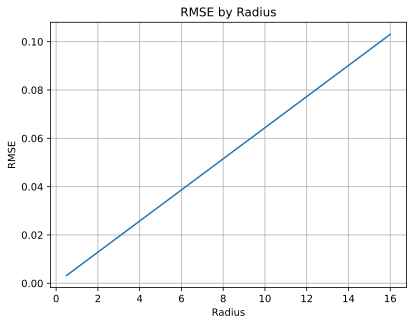

In [10]:
plt.plot(radii, rmse_by_radius)
plt.xlabel("Radius")
plt.ylabel("RMSE")  
plt.title("RMSE by Radius")
plt.grid()

In [11]:
# we see a linear relationship above. Write the equation to help get the slope and y intercept
m = (rmse_by_radius[-1] - rmse_by_radius[0]) / (radii[-1] - rmse_by_radius[0])
m

0.006241077451231551

In [12]:
b = m * radii[0] - rmse_by_radius[0]
b

-0.00010001416147134394

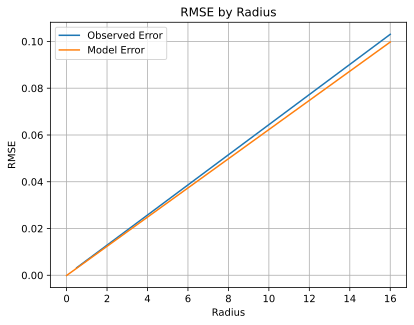

In [13]:
# plot the overlay to see how close they are
x = np.linspace(0, 16, 100)
y = m * x + b
plt.plot(radii, rmse_by_radius, label="Observed Error")
plt.plot(x, y, label="Model Error")
plt.xlabel("Radius")
plt.ylabel("RMSE")  
plt.title("RMSE by Radius")
plt.legend()
plt.grid()

In [14]:
print(f"Equation: rmse = {m} * radius {b}")

Equation: rmse = 0.006241077451231551 * radius -0.00010001416147134394


**c) Discussion.** What mathematical relationship between the radius and the RMSE do you observe (write down an equation)? Explain why this is the case.

From above, we have derived a model between the radius and RMSE, and the plot shows that there is a linear relationship. An equation that fits this data very closely is: rmse = 0.006241077451231551 * radius - 0.00010001416147134394. From this relationship, we can conclude that the rmse is proportional to the radius. This makes sense, because we are keeping the number of neurons constant. As we increase the size of the space we are representing (larger radius) while keeping the number of neurons constant, the representation is worse as it must represent more values and thus has larger error (as observed).

**d) RMSE and refractory period.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{ref}$ changes between $1$ and $5\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{ref}$ and produce a plot showing the RMSE over $\tau_\mathrm{ref}$. Again, make sure to use the same neuron ensemble parameters in all your trials.

In [15]:
with model:
    # reset the radius
    ens_1d.radius = 1

In [16]:
tau_refs = np.linspace(1e-3, 5e-3, 25)
tau_refs

array([0.001     , 0.00116667, 0.00133333, 0.0015    , 0.00166667,
       0.00183333, 0.002     , 0.00216667, 0.00233333, 0.0025    ,
       0.00266667, 0.00283333, 0.003     , 0.00316667, 0.00333333,
       0.0035    , 0.00366667, 0.00383333, 0.004     , 0.00416667,
       0.00433333, 0.0045    , 0.00466667, 0.00483333, 0.005     ])

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

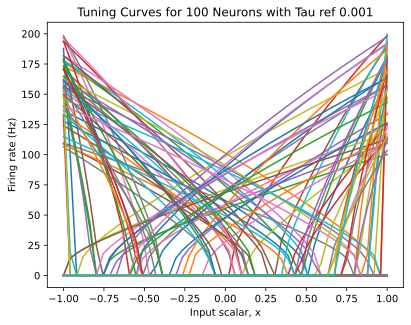

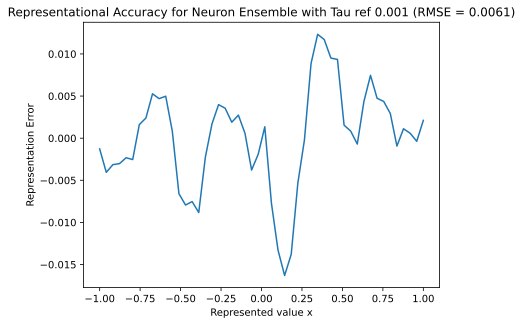

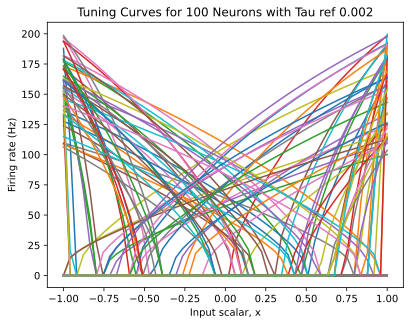

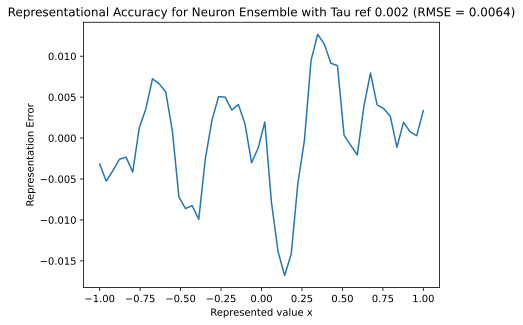

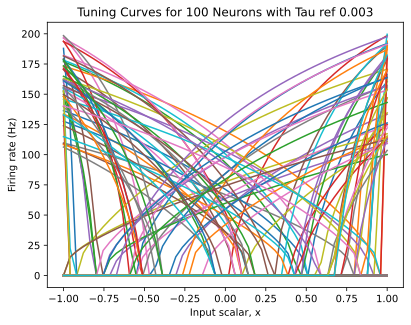

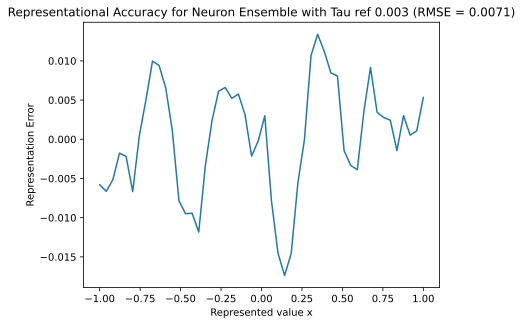

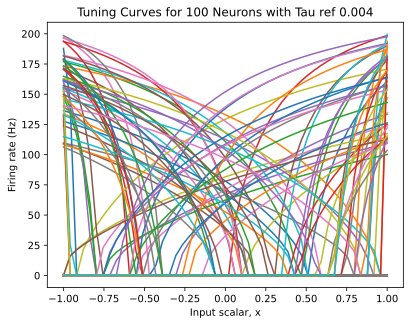

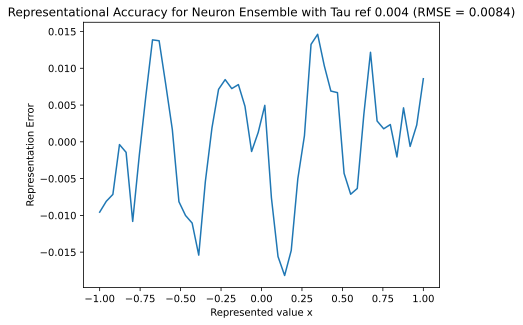

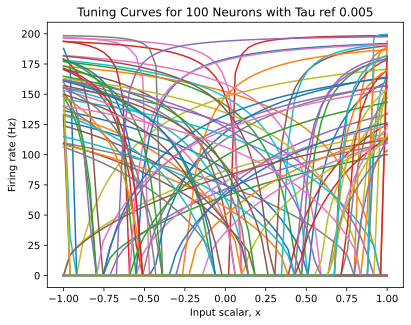

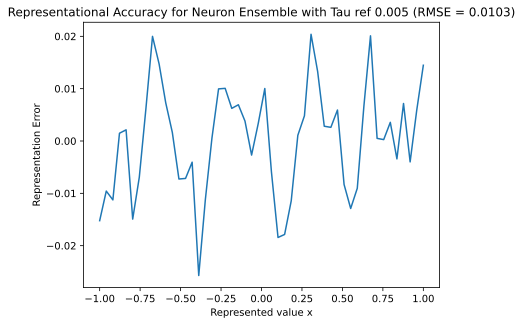

In [17]:
rmse_by_tau_ref = []
for tau_ref in tau_refs:
    with model:
        ens_1d.neuron_type = nengo.LIF(tau_rc=0.02, tau_ref = tau_ref)

    with nengo.Simulator(model) as sim:
        eval_points, activities = tuning_curves(ens_1d, sim)

        _, targets, decoded = eval_point_decoding(
            self_identity_conn, sim, eval_points=eval_points
        )

    if tau_ref in [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]:
        plt.figure()
        plt.plot(eval_points, activities)
        plt.ylabel("Firing rate (Hz)")
        plt.xlabel("Input scalar, x")
        plt.title(f"Tuning Curves for 100 Neurons with Tau ref {tau_ref}")

        plt.figure()

        plot_decoded_error(targets[:, 0], decoded[:, 0], f"Representational Accuracy for Neuron Ensemble with Tau ref {tau_ref}")
    
    rmse = np.sqrt(np.mean((targets[:, 0] - decoded[:, 0]) ** 2))
    rmse_by_tau_ref.append(rmse)

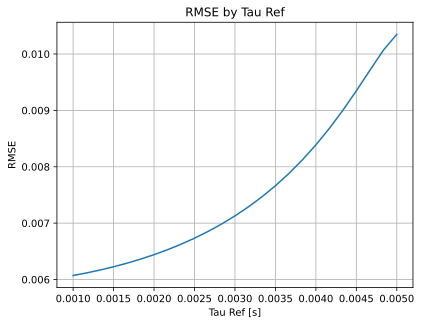

In [18]:
plt.plot(tau_refs, rmse_by_tau_ref)
plt.xlabel("Tau Ref [s]")
plt.ylabel("RMSE")  
plt.title("RMSE by Tau Ref")
plt.grid()

**e) RMSE and membrane time constant.** What happens to the RMSE and the tuning curves as $\tau_\mathrm{RC}$ changes between $10$ and $100\,\mathrm{ms}$? Plot the tuning curves for at least four different $\tau_\mathrm{RC}$ and produce a plot showing the RMSE over $\tau_\mathrm{RC}$.  Again, make sure to use the same neuron ensemble parameters in all your trials.

In [19]:
tau_rcs = np.linspace(10e-3, 100e-3, 91)
tau_rcs

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

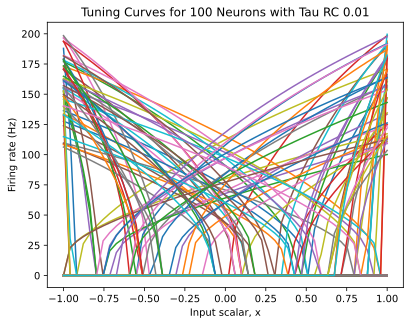

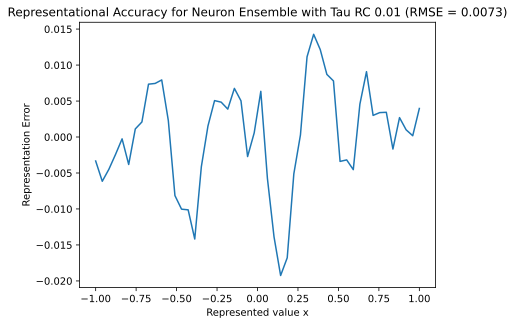

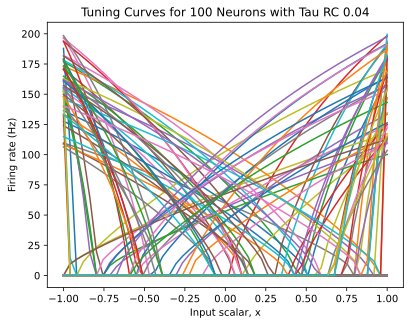

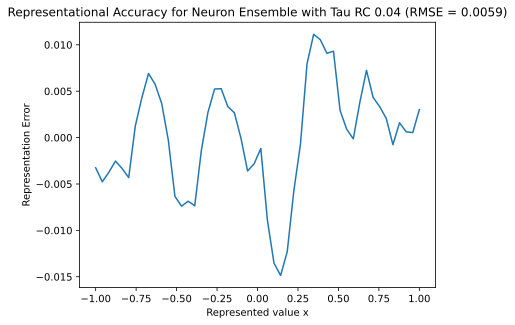

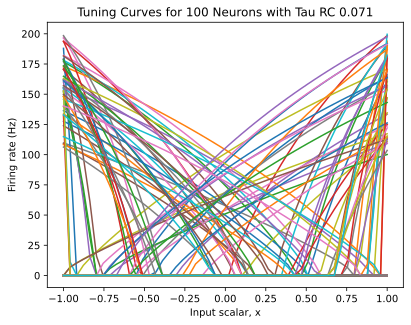

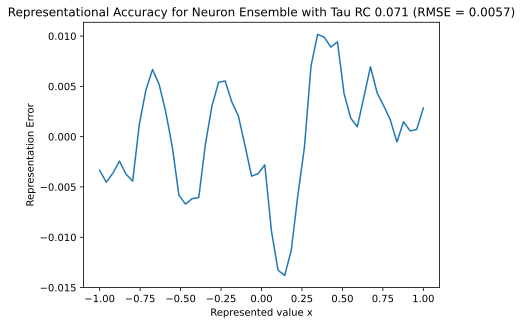

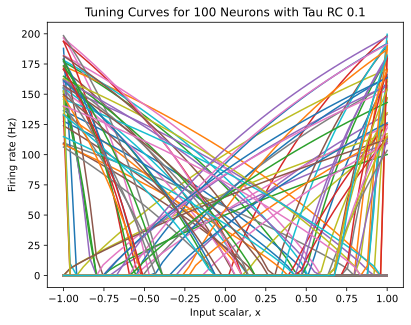

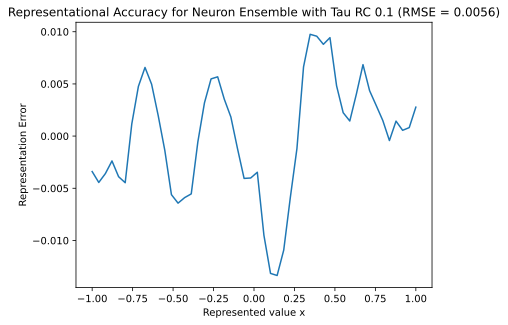

In [20]:
rmse_by_tau_rc = []
for tau_rc in tau_rcs:
    with model:
        ens_1d.neuron_type = nengo.LIF(tau_rc=tau_rc, tau_ref = 0.002)

    with nengo.Simulator(model) as sim:
        eval_points, activities = tuning_curves(ens_1d, sim)

        _, targets, decoded = eval_point_decoding(
            self_identity_conn, sim, eval_points=eval_points
        )

    if tau_rc in [0.01, 0.04, 0.071, 0.1]:
        # only plot some
        plt.figure()
        plt.plot(eval_points, activities)
        plt.ylabel("Firing rate (Hz)")
        plt.xlabel("Input scalar, x")
        plt.title(f"Tuning Curves for 100 Neurons with Tau RC {tau_rc}")

        plt.figure()
        plot_decoded_error(targets[:, 0], decoded[:, 0], f"Representational Accuracy for Neuron Ensemble with Tau RC {tau_rc}")

    rmse = np.sqrt(np.mean((targets[:, 0] - decoded[:, 0]) ** 2))
    rmse_by_tau_rc.append(rmse)

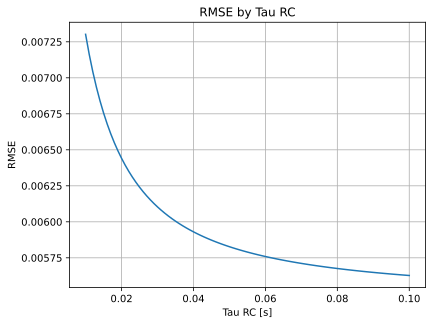

In [21]:
plt.plot(tau_rcs, rmse_by_tau_rc)
plt.xlabel("Tau RC [s]")
plt.ylabel("RMSE")  
plt.title("RMSE by Tau RC")
plt.grid()

**f) Discussion.** Discuss the last two results. Describe what happens to the tuning curves as $\tau_\mathrm{ref}$ and $\tau_\mathrm{RC}$ change (you do not need to come up with a mathematical relationship here). Explain why the change in tuning curve shape influences the RMSE in the way you observe.

When we increase tau ref from 1ms -> 5ms, the tuning curves have less steeper slopes (ie.firing rate is almost max just past the x intercept). This occurs because the neurons saturate quicker as they cannot fire faster (the refractory time inhibits firing), so they max out their firing rate quickly (which is still set between 100 and 200 Hz). As a result, we have less variation in the way that the tuning curves can fire, and the RMSE is observed to increase in a non-linear growth fashion. 

When we increase tau rc from 10ms -> 100ms, we observe the tuning curves go from curvy to more relu-like. We note that we still have the same max firing rates, so the relu like curves do better at representing the space as they have more variance in their firing rates, so the RMSE is observed to decrease in a non-linear fashion.

# 2. Connecting neurons

**a) Computing the identity function.** Show the input value and the decoded values from the two  ensembles in three separate plots. Run the simulation for $0.5\,\mathrm{s}$.

In [22]:
model_2 = nengo.Network(seed=9)

with model_2:
    # create first ensemble
    ens_1 = nengo.Ensemble(
        n_neurons = 100,
        dimensions = 1,
        intercepts = nengo.dists.Uniform(-1, 1),
        max_rates = nengo.dists.Uniform(100, 200),
        neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.002)
    )

    # create the second ensemble
    ens_2 = nengo.Ensemble(
    n_neurons = 50,
    dimensions = 1,
    intercepts = nengo.dists.Uniform(-1, 1),
    max_rates = nengo.dists.Uniform(100, 200),
    neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.002)
    )

    nd_input = nengo.Node(nengo.processes.Piecewise({
        0.1: 1.0,
        0.4: 0.0,
    }))

    stim_conn = nengo.Connection(nd_input, ens_1)
    forward_identify = nengo.Connection(ens_1, ens_2, synapse=0.01)

    # create probes
    input_probe = nengo.Probe(nd_input, synapse=0.01)
    ens1_probe = nengo.Probe(ens_1, synapse=0.01)
    ens2_probe = nengo.Probe(ens_2, synapse=0.01)

    

In [23]:
with nengo.Simulator(model_2) as sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Input Into Ensembles With 10ms Synaptic Filter')

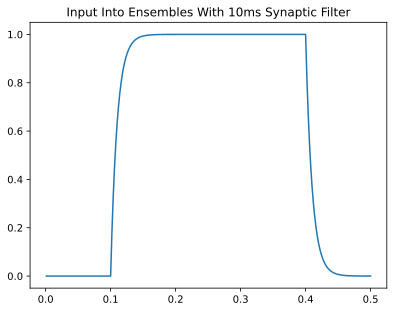

In [24]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe])
plt.title("Input Into Ensembles With 10ms Synaptic Filter")

Text(0.5, 1.0, 'Output of Ensemble 1 With 10ms Synaptic Filter')

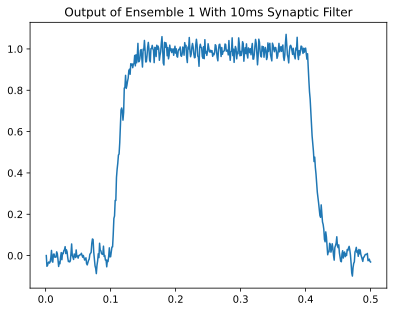

In [25]:
plt.plot(sim.trange(), sim.data[ens1_probe])
plt.title("Output of Ensemble 1 With 10ms Synaptic Filter")

Text(0.5, 1.0, 'Output of Ensemble 2 With 10ms Synaptic Filter')

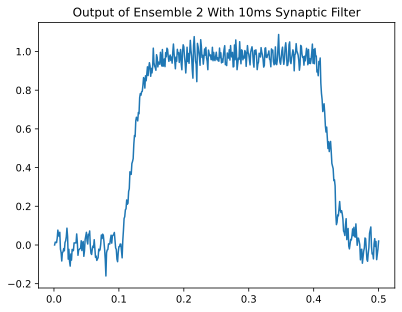

In [26]:
plt.plot(sim.trange(), sim.data[ens2_probe])
plt.title("Output of Ensemble 2 With 10ms Synaptic Filter")

**b) Computing an affine transformation.** Make a new version of the model where instead of computing the identity function, it computes $y(t) = 1 - 2x(t)$. Show the same graphs as in part (a).

In [27]:
with model_2:
    # create first ensemble
    ens_1 = nengo.Ensemble(
        n_neurons = 100,
        dimensions = 1,
        intercepts = nengo.dists.Uniform(-1, 1),
        max_rates = nengo.dists.Uniform(100, 200),
        neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.002)
    )

    # create the second ensemble
    ens_2 = nengo.Ensemble(
    n_neurons = 50,
    dimensions = 1,
    intercepts = nengo.dists.Uniform(-1, 1),
    max_rates = nengo.dists.Uniform(100, 200),
    neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.002)
    )

    nd_input = nengo.Node(nengo.processes.Piecewise({
        0.1: 1.0,
        0.4: 0.0,
    }))

    stim_conn = nengo.Connection(nd_input, ens_1)
    forward_identify = nengo.Connection(ens_1, ens_2, synapse=0.01, function = lambda x: 1 - 2*x)

    # create probes
    input_probe = nengo.Probe(nd_input, synapse=0.01)
    ens1_probe = nengo.Probe(ens_1, synapse=0.01)
    ens2_probe = nengo.Probe(ens_2, synapse=0.01)

In [28]:
with nengo.Simulator(model_2) as sim:
    sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Input Into Ensembles With 10ms Synaptic Filter')

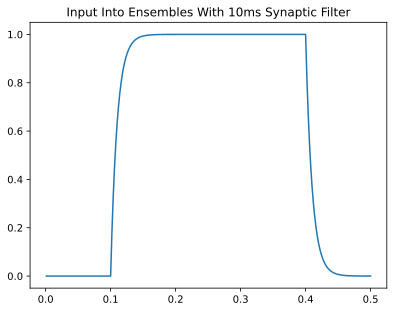

In [29]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[input_probe])
plt.title("Input Into Ensembles With 10ms Synaptic Filter")

Text(0.5, 1.0, 'Output of Ensemble 1 With 10ms Synaptic Filter')

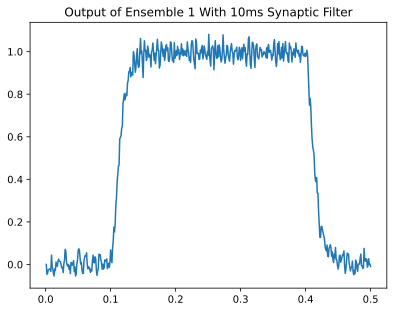

In [30]:
plt.plot(sim.trange(), sim.data[ens1_probe])
plt.title("Output of Ensemble 1 With 10ms Synaptic Filter")

Text(0.5, 1.0, 'Output of Ensemble 2 With 10ms Synaptic Filter')

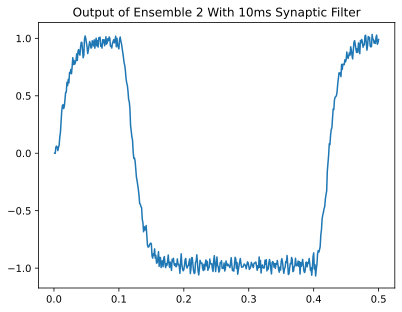

In [31]:
plt.plot(sim.trange(), sim.data[ens2_probe])
plt.title("Output of Ensemble 2 With 10ms Synaptic Filter")

# 3. Dynamics

**a) Transforming the dynamical system.** Rewrite the linear dynamical system describing the integrator in terms of $\frac{\mathrm{d}\vec x(t)}{\mathrm{d}t} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u}$, i.e., write down the matrices $\mathbf{A}$ and $\mathbf{B}$ (you can just use the equations from class, you do not have to re-derive the equations) What are the matrices $\mathbf{A}'$ and $\mathbf{B}'$ we have to use when implementing this system using the recurrent connection post-synaptic filter?

![Q3a Rough Work](./screenshots/q3_a_work.PNG)

**b) Integrator using spiking neurons.**  Show the input, the ideal integral, and the value represented by the ensemble when the input is a value of $0.9$ from $t=0.04$ to $t=1.0$ (and $0$ for other times). Run the simulation for $1.5\,\mathrm{s}$.

In [32]:
from dataclasses import dataclass

@dataclass
class EnsembleParams:
    n_neurons: int
    neuron_type: nengo.Ensemble.neuron_type
    tau_recurrent: float = 0.05
    tau_input: float = 0.005

In [33]:
params = EnsembleParams(200, nengo.LIF)

In [34]:
def plot_integrator_dynamics(ensemble_params: EnsembleParams, input, sim_time = 1.5, seed=8):
    model = nengo.Network(seed=seed)

    with model:
        # create first ensemble
        ens_1 = nengo.Ensemble(
            n_neurons = ensemble_params.n_neurons,
            dimensions = 1,
            intercepts = nengo.dists.Uniform(-1, 1),
            max_rates = nengo.dists.Uniform(100, 200),
            neuron_type = ensemble_params.neuron_type(tau_rc=0.02, tau_ref=0.002)
        )

        neural_input = nengo.Node(input)

        # for integrator, connection is tau
        tau_max = max(ensemble_params.tau_input, ensemble_params.tau_recurrent)
        stim_conn = nengo.Connection(neural_input, ens_1, function = lambda u: tau_max * u, synapse = ensemble_params.tau_input)
        recurrent_conn = nengo.Connection(ens_1, ens_1, function = lambda x: x, synapse = ensemble_params.tau_recurrent)

        # create probes
        input_probe = nengo.Probe(neural_input, synapse=0.01)
        ens1_probe = nengo.Probe(ens_1, synapse=0.01)
    
    with nengo.Simulator(model) as sim:
        sim.run(sim_time)

    plt.figure()
    plt.plot(sim.trange(), sim.data[input_probe], label="Input")
    plt.plot(sim.trange(), sim.data[ens1_probe], label="Ensemble Integrator Value")
    # note that ideally, x_dot = u, where u is input
    dt = sim.trange()[1] - sim.trange()[0]
    integ = np.cumsum(sim.data[input_probe]) * dt
    plt.plot(sim.trange(), integ, label="Ideal Integrator Value")
    plt.title("Plot of Neural Integrator System")
    plt.legend()
    plt.grid(True)

In [35]:
input = nengo.processes.Piecewise({
        0: 0,
        0.04: 0.9,
        1.0: 0.0,
    })

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

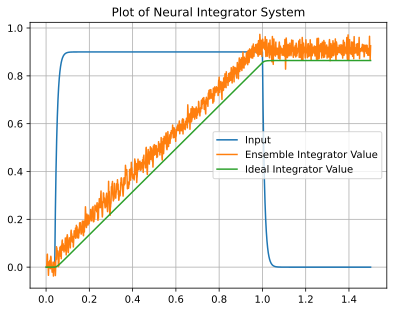

In [36]:
plot_integrator_dynamics(params, input)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

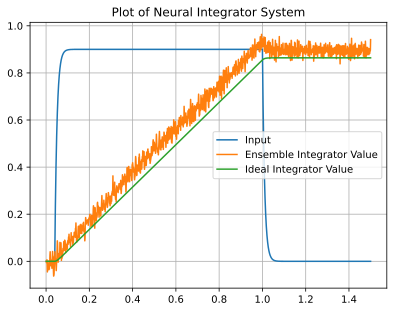

In [37]:
plot_integrator_dynamics(params, input, seed=11)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

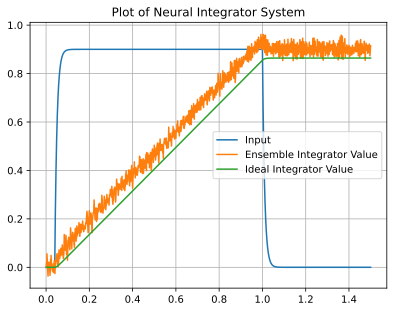

In [38]:
plot_integrator_dynamics(params, input, seed=17)

**c) Discussion.** What is the expected ideal result, i.e., if we just mathematically computed the integral of the input, what is the equation describing the integral? How does the simulated output compare to that ideal?

![Q3c Work](./screenshots/q3_c_work_2.PNG)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

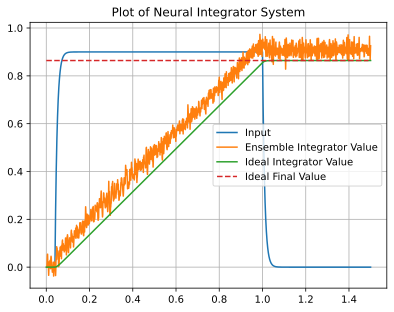

In [39]:
plot_integrator_dynamics(params, input)
plt.plot(np.arange(0, 1.5, 0.01), np.repeat(0.864, 150), label = "Ideal Final Value", linestyle="--")
plt.legend()

By analyzing the definite integral piecewise, we can see that for t < 0.04, we expect 0. For 0.04 <= t < 1 we expect 0.9*(t - 0.04). For t >= 1, we expect 0.864. Note that I have already plotted the ideal using the cumsum method and accounting for dt so I will not replot it here. We note that numerically computing the integral yields a result that is very close to the actual value, as we have plotted the ideal final value over the ideal integrator value, and observe they match.

As for the comparison between the simulated and ideal output, we can see that the simulated output is consistently slightly higher than the ideal output, however, they are pretty close and evidently the neural implementation does follow the dynamics of the integrator. This could be a result of the post synaptic filters use, as we note that the dynamics of the system are largely dominated by the synapse. Note that the results also vary slightly as a result of the random neuron parameters (max firing rate and intercepts).

**d) Simulation using rate neurons.** Change the neural simulation to rate mode. Re-run the simulation in rate mode. Show the resulting plots.

In [40]:
params_2 = EnsembleParams(200, nengo.LIFRate)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

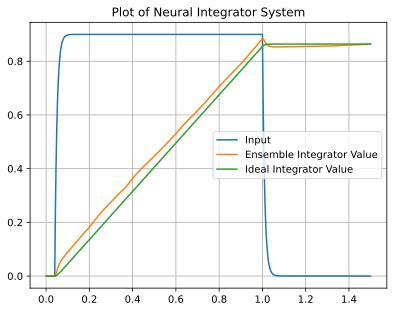

In [41]:
plot_integrator_dynamics(params_2, input, 1.5)

**e) Discussion.** How does this compare to the result in part (b)? What deviations from the ideal do you still observe? Where do those deviations come from?

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

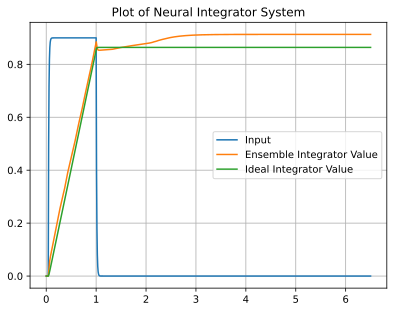

In [42]:
plot_integrator_dynamics(params_2, input, 6.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

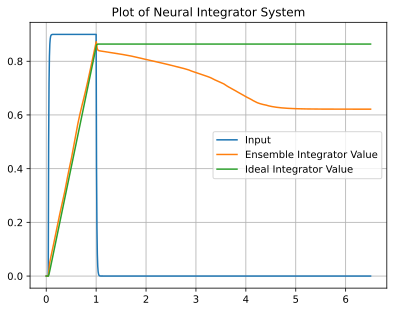

In [43]:
plot_integrator_dynamics(params_2, input, 6.5, seed = 15)

Relative to part (b), we observe a few key differences. First, the value of the ensemble is not noisy, as the rate model is operating with continuous values (firing rate of neurons) and not with noisy spikes. As a result, the output is quite clean. There is also a more pronounced increase when in input goes from 0 -> 0.9, and a more visible decrease when it drops back down. However, it still follows quite closely to the result in part (b). As for deviations from the ideal, we see a quick increase as the input rises, which forces the ensemble value above the integrator value. This is likely a result of the dynamics being thrown off by post synaptic filter values, along with the shape of the LIF neuron tuning curves, which create this sort of shape. Also, there is a deviation after the input goes back down to 0. From the plot above (running for 6.5 second) we observe that the simulated value continues to change for a few seconds, likely also as a result of the synaptic filters on the system dynamics. Note that with a different seed, the behavior past t = 1 second changes drastically. In the first plot the value rises above the ideal slightly, and in the second it drops significantly. This is a result of the random parameters chosen for the neurons. 

**f) Integration of a shorter input pulse.** Returning to spiking mode, change the input to be a value of $0.9$ from $t=0.04$ to $0.16$. Show the same plots as before (the input, the ideal, and the value represented by the ensemble over $1.5\,\mathrm{s}$).

In [44]:
input_2 = nengo.processes.Piecewise({
    0.04: 0.9,
    0.16: 0.0,
})

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

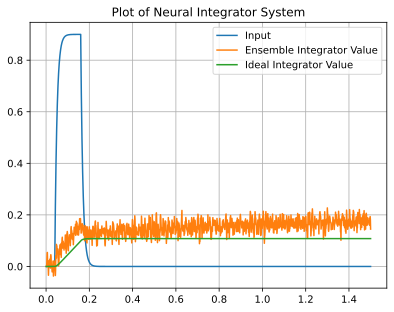

In [45]:
plot_integrator_dynamics(params, input_2)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

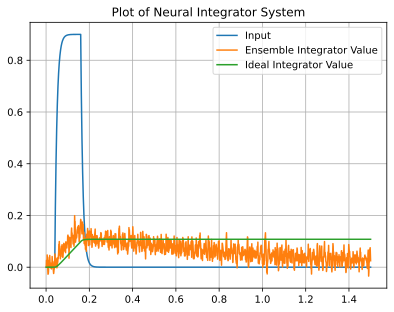

In [46]:
plot_integrator_dynamics(params, input_2, seed=15)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

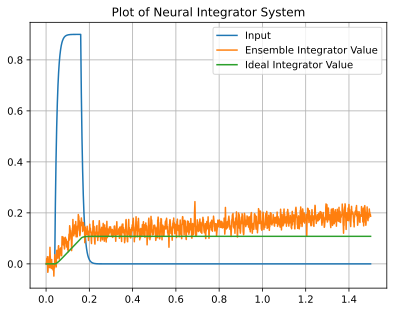

In [47]:
plot_integrator_dynamics(params, input_2, seed=22)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

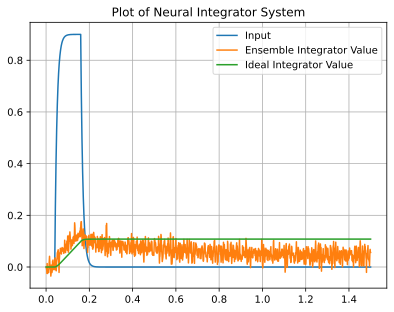

In [48]:
plot_integrator_dynamics(params, input_2, seed=57)

**g) Discussion.** How does this compare to (b)? What is the ideal equation? Does it work as intended? If not, why is it better or worse?

![Q3g Work](./screenshots/q3_g_work.PNG)

It is not working as intended, as the integrator is unable to sustain the final value after is stops changing (ie. when the input goes back down to 0). On running the simulation with 4 different seeds, we can see that the integrator either 'leaks' back down to 0, or continues rising past the ideal value (which was not observed in part (b)). The reason may be that the state neurons did not have enough time to capture the integrator dynamics, thus they differed. We note that the integrator captures the input change well, as it has a post synaptic time constant of 5ms... however the dynamic changes had issues as the recurrent connection had a synaptic filter of 50ms. In this case, the input changed for just over 100ms which is nearing the post synaptic filter of the recurrent connection, thus not enabling changes to the state fast enough for the system to fully capture the dynamics (in this case). Particularly, I do not believe this is an issue with the firing rate, as we observe that the neural implementation was able to reach the final value... it just wasn't able to retain it.

**h) Input ramp.** Change the input to a ramp input from $0$ to $0.9$ from $t=0$ to $t=0.45$ (and $0$ for $t>0.45$). Show the same plots as in the previous parts of this question.

In [49]:
ramp_input = lambda t: 2*t if t <= 0.45 else 0

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

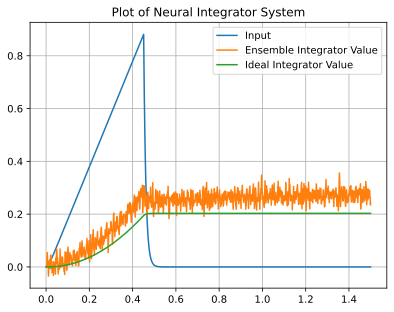

In [50]:
plot_integrator_dynamics(params, ramp_input)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

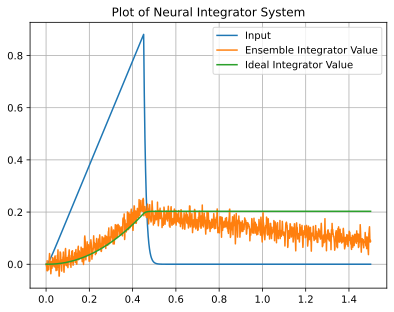

In [51]:
plot_integrator_dynamics(params, ramp_input, seed=57)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

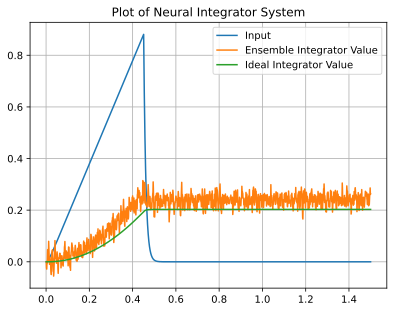

In [52]:
plot_integrator_dynamics(params, ramp_input, seed=23)

**i) Discussion.** What does the ensemble end up representing, and why? What is the (ideal) equation for the curve traced out by the ensemble?

![Q3i Work](./screenshots/q3_i_work.PNG)

Evidently, the ensemble is attempting to represent a quadratic curve (y = x^2), followed by the sustained end value of the curve. Generally speaking, we see that the ensemble value does follow the ideal value (thus it does a good job at following the qudratic curve) although has some noise (as a result of the noisy spikes). Furthermore, depending on neuron parameters, the ensemble can either hold the final value or may leak back down to 0. This is a result of the interplay between the 50ms post synaptic recurrent connection and the random generated neuron parameters for the ensemble. 

**j) Sinusoidal input.** Change the input to $5\sin(5t)$. Show the same plots as before.

In [53]:
sinusoidal_input = lambda t: 5 * np.sin(5*t)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

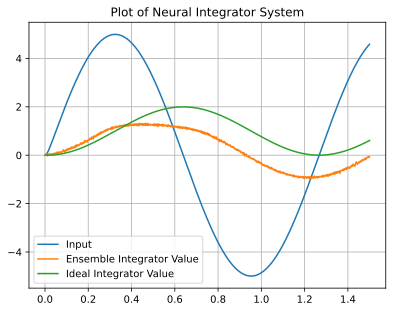

In [54]:
plot_integrator_dynamics(params, sinusoidal_input)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

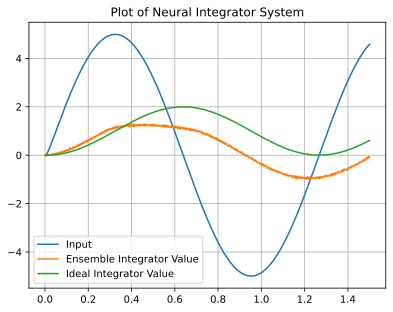

In [55]:
plot_integrator_dynamics(params, sinusoidal_input, seed=57)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

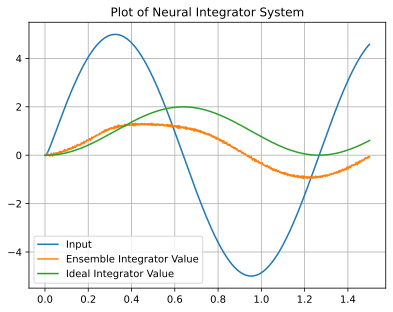

In [56]:
plot_integrator_dynamics(params, sinusoidal_input, seed=23)

**k) Discussion.** What should the value represented by the ensemble be? Write the equation. How well does it do? What are the differences between the model's behaviour and the expected ideal behaviour and why do these differences occur?

![Q3k Work](./screenshots/q3_k_work.PNG)

The value is not so close to the ideal in this case. We note that the neurons are much less noisy (which is good), however, in this case we do end up saturating the max firing rate of the neurons and thus they are unable to represent certain values. After about a value of 1, the neurons start to saturate, so the model levels off. However, when the ideal value starts to decrease, the model also decreases. The appear to decrease at the same rate, however, they started out with an offset of ~ 1 when the saturation occured. As a result, the model continues to have an offset of ~1 from the ideal the entire time (as it does not saturate from the bottom). This makes the model differ from the ideal... however we can still generally see the dynamics that are being followed.

**l) Controlled integrator.** Implement a controlled integrator over two popoulations. Demonstrate that it's working as expected.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

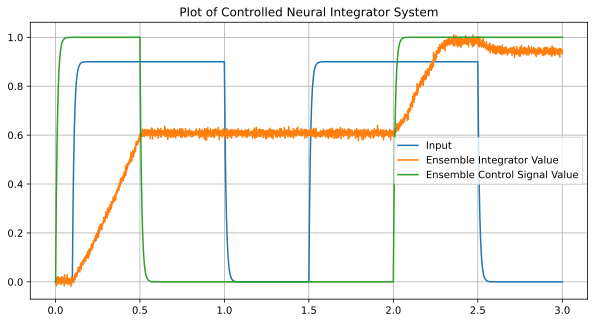

In [57]:
model = nengo.Network(seed=10)
with model:
    integ_ensemble = nengo.Ensemble(
        n_neurons = 200,
        dimensions = 1,
        radius=1
    )

    control_ensemble = nengo.Ensemble(
        n_neurons = 100,
        dimensions = 2, # dim 1 for input, dim 2 for control
        radius=1
    )


    input = nengo.Node(nengo.processes.Piecewise({
        0.1: 0.9,
        1.0: 0.0,
        1.5: 0.9,
        2.5: 0
    }))


    control_signal = nengo.Node(nengo.processes.Piecewise({
        0.0: 1.0,
        0.5: 0.0,
        2.0: 1.0,
    }))

    # for integrator, connection is tau
    tau_max = 0.03

    input_conn = nengo.Connection(input, control_ensemble[0], synapse = 0.005)
    control_stim_conn = nengo.Connection(control_signal, control_ensemble[1], synapse=0.005)
    # gait the input by multiplying the control signal by the input. If control signal = 0, then the input into the integrator will be 0 (as desired)
    controlled_stim = nengo.Connection(control_ensemble, integ_ensemble, function = lambda u: tau_max * u[0] * u [1], synapse = 0.005)
    recurrent_conn = nengo.Connection(integ_ensemble, integ_ensemble, function = lambda x: x, synapse = 0.01)


    # create probes
    input_probe = nengo.Probe(input, synapse=0.01)
    control_probe = nengo.Probe(control_signal, synapse=0.01)
    integrator_probe = nengo.Probe(integ_ensemble, synapse=0.01)

with nengo.Simulator(model) as sim:
    sim.run(3.0)

plt.figure(figsize=(10, 5))
plt.plot(sim.trange(), sim.data[input_probe], label="Input")
plt.plot(sim.trange(), sim.data[integrator_probe], label="Ensemble Integrator Value")

plt.plot(sim.trange(), sim.data[control_probe], label="Ensemble Control Signal Value")


plt.title("Plot of Controlled Neural Integrator System")
plt.legend()
plt.grid(True)

Evidently, the controlled integrator above is working as expected... it stops when the control signal turns off, and continues when it turns back on.

**m) 🌟 Bonus question.** Implement a nonlinear dynamical system we have not seen in class (and that is not in the book). Demonstrate that it's working as expected

![Bonus Work](./screenshots/bonus_work.PNG)

In [58]:
from mpl_toolkits.mplot3d import Axes3D

g = 9.81
l = 10 # length of string
tau = 0.1

def feedback(y):
    dy1 = y[1]
    dy2 = -(g/l) * np.sin(y[0])

    return [
        dy1 * tau + y[0],
        dy2 * tau + y[1],
    ]


model = nengo.Network(label="Pendulum", seed=15)
with model:
    state = nengo.Ensemble(1000, dimensions=2, radius=10)
    nengo.Connection(state, state, function=feedback, synapse=tau)
    state_probe = nengo.Probe(state, synapse=tau)

with nengo.Simulator(model) as sim:
    sim.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

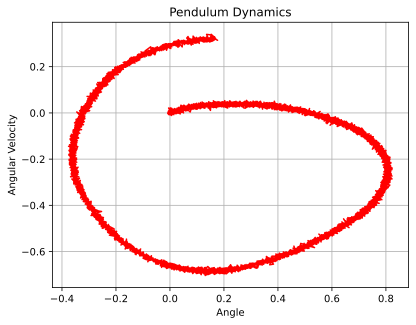

In [59]:
# Plot the results
plt.plot(sim.data[state_probe][:, 0], sim.data[state_probe][:, 1], color='red')
plt.xlabel('Angle')
plt.ylabel('Angular Velocity')
plt.title('Pendulum Dynamics')
plt.grid(True)
plt.show()

Note that oscillations from the pendulum are observed in the phase portrait, illustrating the dynamical system.